In [4]:
install.packages("WDI", repos = "https://cloud.r-project.org/")
install.packages("forecast", repos = "https://cloud.r-project.org/")
install.packages("ggplot2", repos = "https://cloud.r-project.org/")
install.packages("TSA", repos = "https://cloud.r-project.org/")
install.packages("dplyr", repos = "https://cloud.r-project.org/")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘scales’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘leaps’, ‘locfit’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
library(WDI)
library(forecast)
library(ggplot2)
library(TSA)
library(dplyr)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
datos <- WDI(indicator="SP.DYN.CBRT.IN",
country="1W",
start=1960,
end=2021)

In [7]:
head(datos)

,country,iso2c,iso3c,year,SP.DYN.CBRT.IN
,<chr>,<chr>,<chr>,<int>,<dbl>
1,World,1W,WLD,2021,16.93866
2,World,1W,WLD,2020,17.22661
3,World,1W,WLD,2019,17.81770
4,World,1W,WLD,2018,18.17881
5,World,1W,WLD,2017,18.70010
6,World,1W,WLD,2016,19.17389


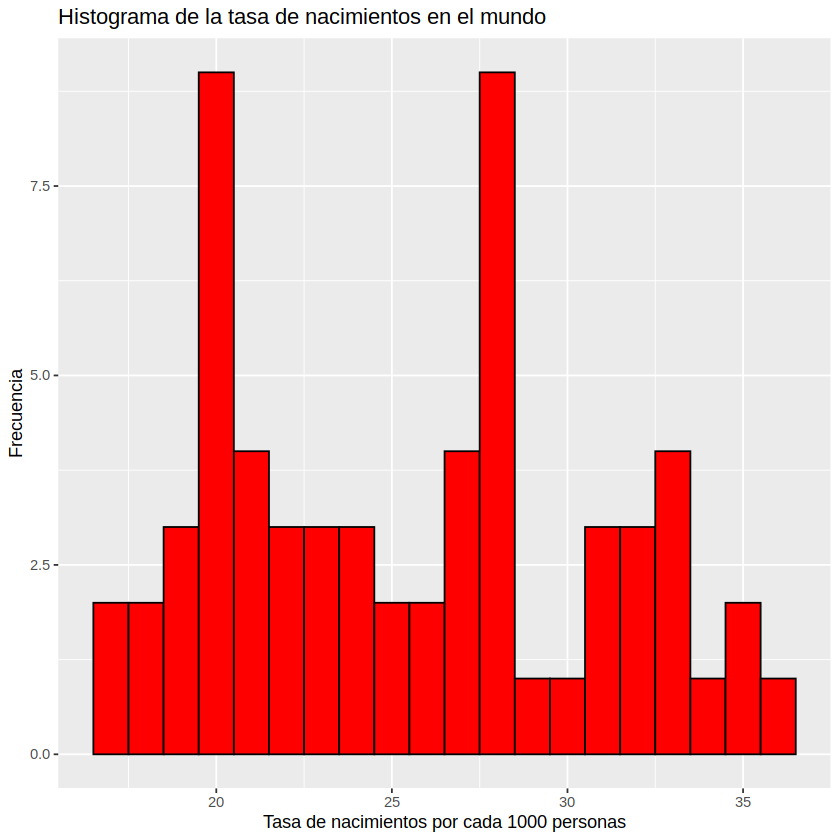

In [9]:
ggplot(datos, aes(x = SP.DYN.CBRT.IN)) + geom_histogram(binwidth=1, fill="red", color="black") + labs(title="Histograma de la tasa de nacimientos en el mundo", x = "Tasa de nacimientos por cada 1000 personas", y = "Frecuencia")

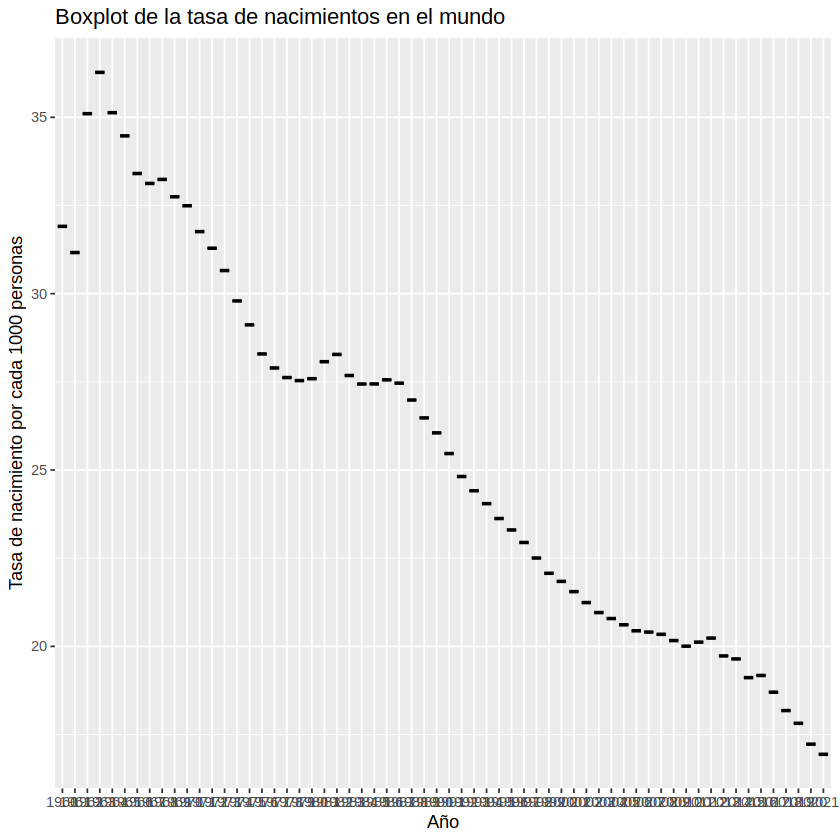

In [20]:
ggplot(datos, aes(x = factor(year), y = SP.DYN.CBRT.IN)) + 
  geom_boxplot(fill = "red", color = "black") + 
  labs(title = "Boxplot de la tasa de nacimientos en el mundo", 
       x = "Año", 
       y = "Tasa de nacimiento por cada 1000 personas")


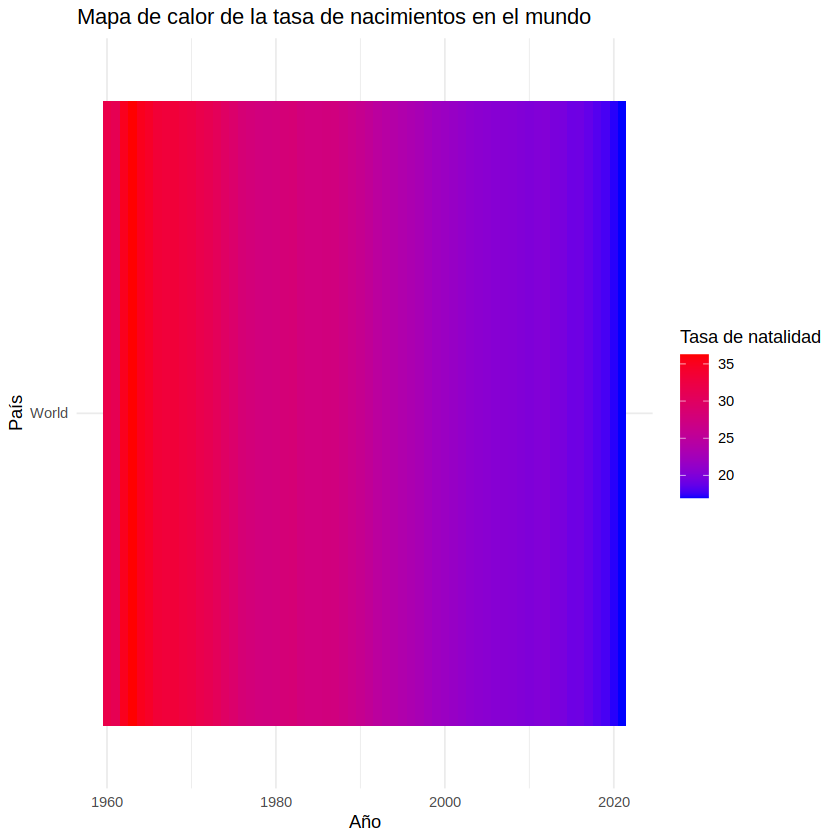

In [21]:
ggplot(datos, aes(x = year, y = country, fill = SP.DYN.CBRT.IN)) + 
  geom_tile() + 
  scale_fill_gradient(low = "blue", high = "red") + 
  labs(
    title = "Mapa de calor de la tasa de nacimientos en el mundo",
    x = "Año",
    y = "País",
    fill = "Tasa de natalidad"
  ) +
  theme_minimal()


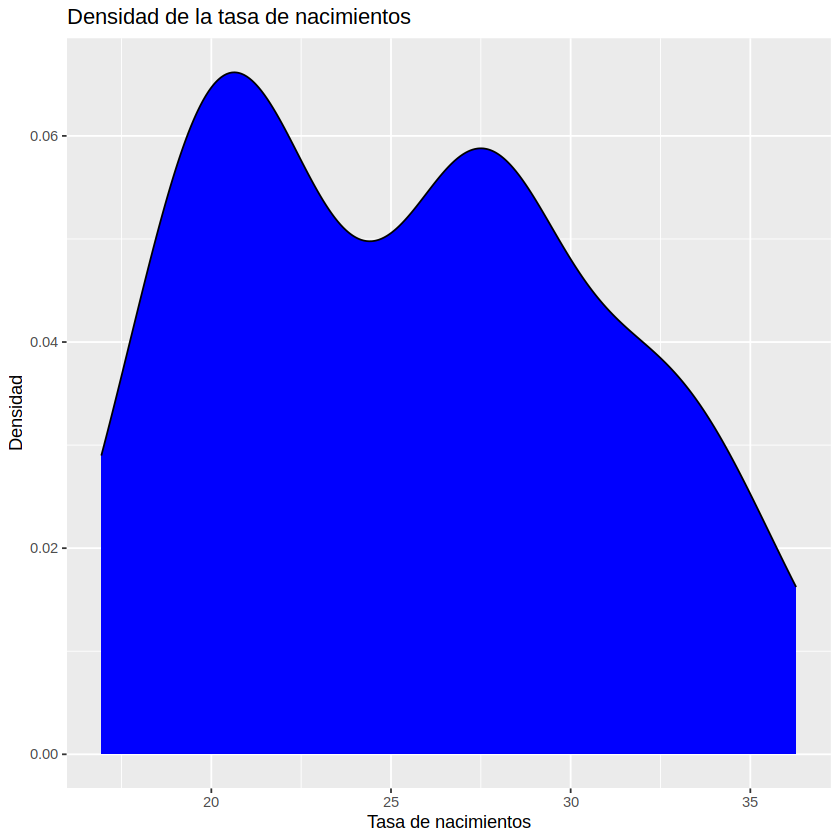

In [11]:
ggplot(datos, aes(x = SP.DYN.CBRT.IN)) +
geom_density(fill="blue", color="black") +
labs(title="Densidad de la tasa de nacimientos",
x= "Tasa de nacimientos",
y = "Densidad")

In [14]:
# Convertir los datos en serie de tiempo
datos_serie <- ts(datos$SP.DYN.CBRT.IN, start = c(min(datos$year)), frequency = 1)


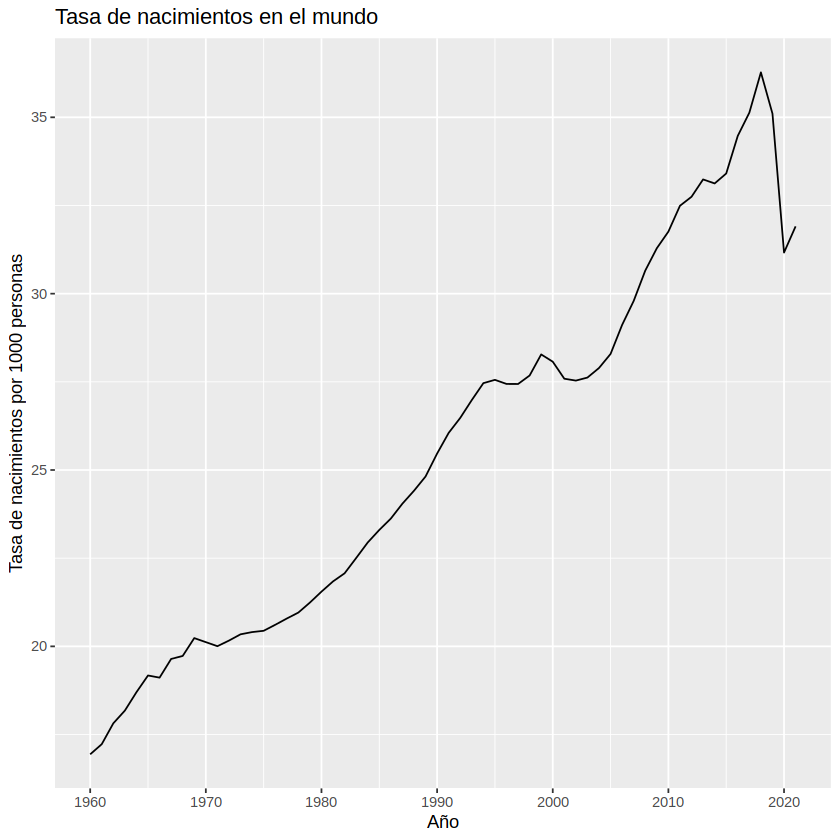

In [15]:
autoplot(datos_serie) + ggtitle("Tasa de nacimientos en el mundo") + 
xlab("Año")+ ylab("Tasa de nacimientos por 1000 personas")

Series: datos_serie 
ARIMA(2,1,1) with drift 

Coefficients:
          ar1      ar2     ma1   drift
      -0.2081  -0.4319  0.7110  0.2666
s.e.   0.2147   0.2189  0.1647  0.0769

sigma^2 = 0.3494:  log likelihood = -53.05
AIC=116.11   AICc=117.2   BIC=126.66

Training set error measures:
                       ME      RMSE       MAE           MPE     MAPE      MASE
Training set 0.0008524914 0.5667799 0.3485377 -0.0003053009 1.295187 0.7670723
                    ACF1
Training set -0.01303583

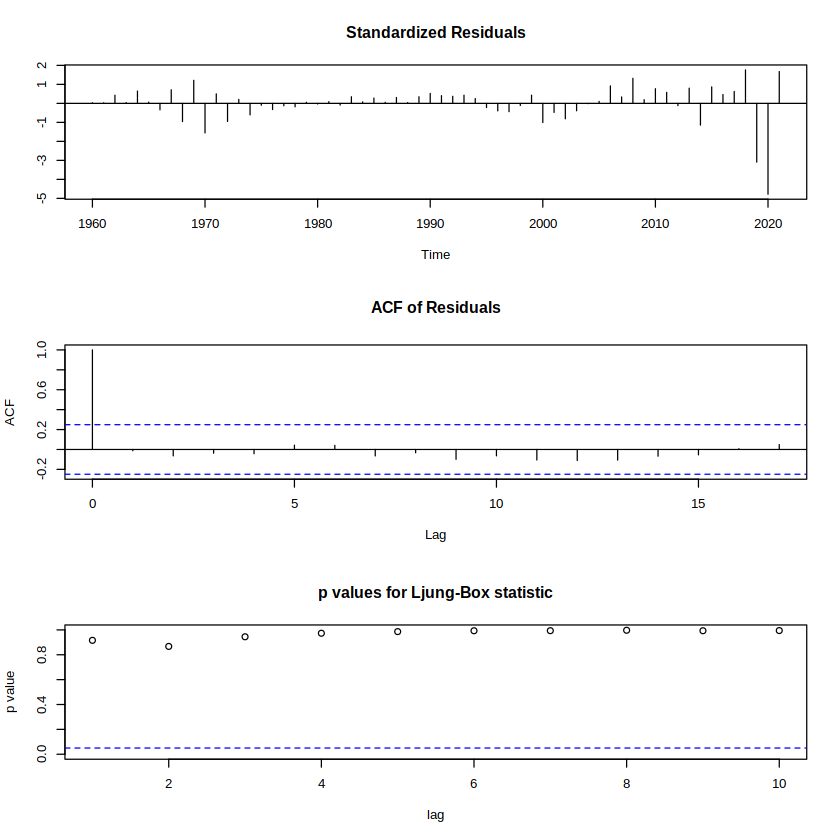


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1) with drift
Q* = 2.184, df = 7, p-value = 0.949

Model df: 3.   Total lags used: 10



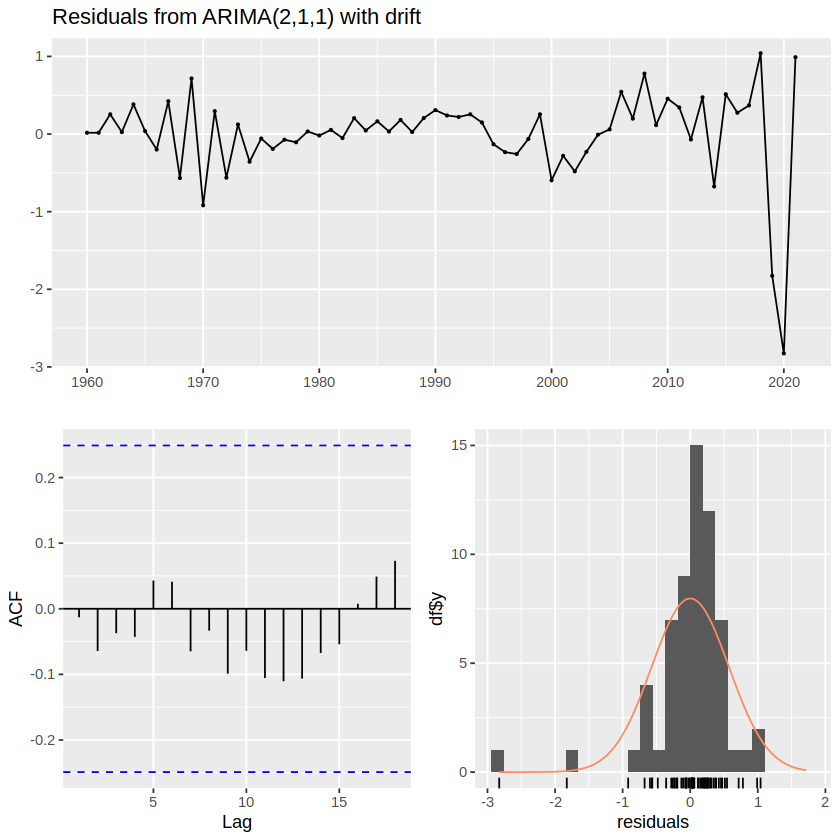

In [16]:
# Predicciones de tasa de nacimientos a 10 años
fit <- auto.arima(datos_serie)

#Resumen del modelo
summary(fit)

#Diagnostico
tsdiag(fit)

# Revisar los residuos o errores del modelo
checkresiduals(fit)

In [17]:
forecast_nacimientos <- forecast(fit, h=10)

In [18]:
forecast_nacimientos

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2022       34.59571 33.83817 35.35326 33.43715 35.75428
2023       34.15274 32.78526 35.52023 32.06136 36.24413
2024       33.52137 31.97029 35.07245 31.14920 35.89354
2025       34.28128 32.59872 35.96384 31.70803 36.85454
2026       34.83305 32.95056 36.71555 31.95402 37.71208
2027       34.82719 32.76628 36.88811 31.67530 37.97909
2028       35.02728 32.83176 37.22279 31.66953 38.38503
2029       35.42537 33.09664 37.75409 31.86389 38.98684
2030       35.69330 33.22850 38.15809 31.92371 39.46288
2031       35.90279 33.31364 38.49193 31.94303 39.86254

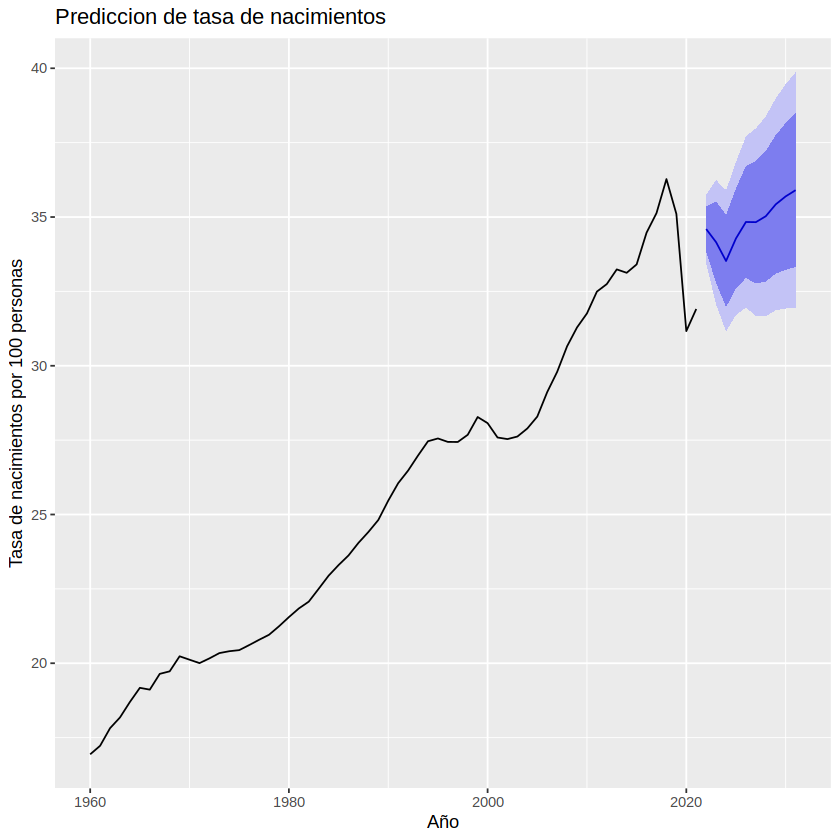

In [19]:
autoplot(forecast_nacimientos) + ggtitle("Prediccion de tasa de nacimientos") +
xlab("Año") + ylab("Tasa de nacimientos por 100 personas")